In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import signal

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフスタイル
plt.rcParams['figure.figsize'] = [12, 9] #グラフサイズ
plt.rcParams['font.size'] = 14 #フォントサイズ


In [2]:
#①AirREGIヘルプデスク日次入電数
data1 = pd.read_csv("regi_call_data_transform.csv", 
                    index_col="cdr_date", 
                   parse_dates=True)

#②AirREGIアカウント獲得数(データが標準化されている)
data2 = pd.read_csv("regi_acc_get_data_transform.csv",
                   index_col="cdr_date",
                   parse_dates=True)

#③AirPAYCM実施日フラグ
data3 = pd.read_csv("cm_data.csv", 
                   index_col="cdr_date",
                   parse_dates=True)

#④Google Trendの関連ワード検索数(週次データ)
data4 = pd.read_csv("gt_service_name.csv",
                   index_col="cdr_date",
                   parse_dates=True)

#⑤カレンダーデータ
data5 = pd.read_csv("calender_data.csv",
                   index_col="cdr_date",
                   parse_dates=True)

#⑥Google Trend "モバイルPOS"検索数(週次データ)
data6 = pd.read_csv("google_trends.csv",
                   index_col="cdr_date",
                   parse_dates=True)

# データ１(ヘルプデスク日次入電数)のEDA

In [3]:
data1.head(5)

,call_num
cdr_date,
2018-06-01,183
2018-06-02,0
2018-06-03,0
2018-06-04,213
2018-06-05,143


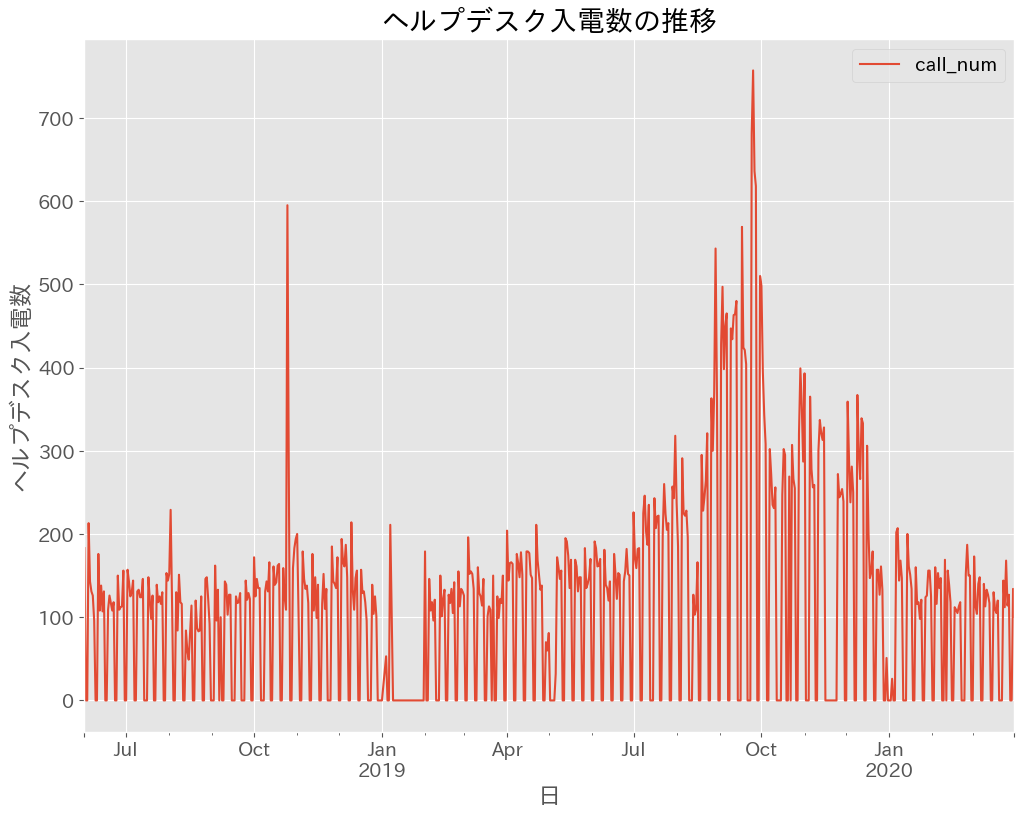

In [4]:
#データ１の可視化
data1.plot()

plt.title("ヘルプデスク入電数の推移")
plt.ylabel("ヘルプデスク入電数")
plt.xlabel("日")

plt.show()

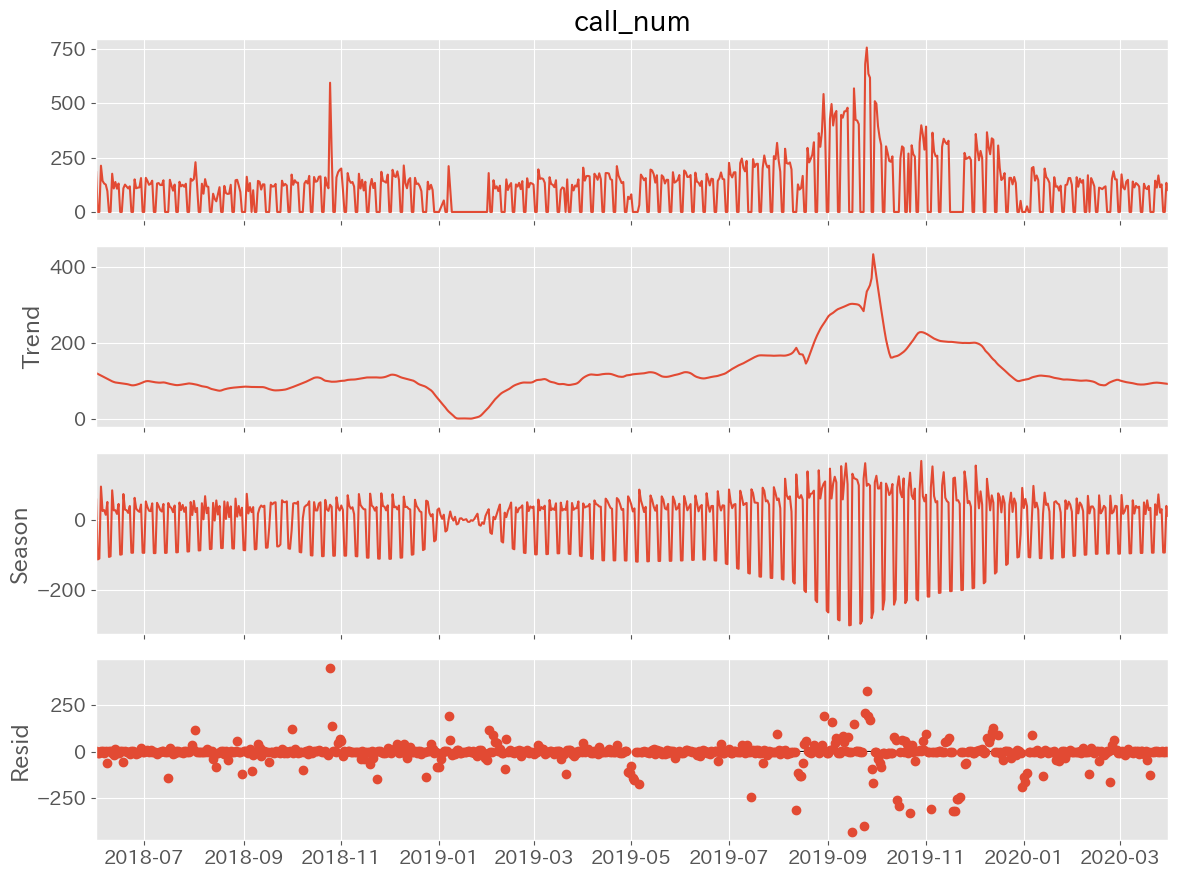

In [5]:
#STL分解
stl = STL(
    data1.call_num,
    period = 7,
    robust = True).fit()

stl.plot()
plt.show()

In [6]:
#ADF検定
data1_test = adfuller(data1.call_num)

# 出力
print('ADF Statistic:', data1_test[0])
print('p-value:', data1_test[1])
print('Critical values:')
for i, j in data1_test[4].items():
    print('\t', i, j)
    
#p値が高いため、差分系列を作って定常過程にする

ADF Statistic: -2.5649054923359547
p-value: 0.10046966048942535
Critical values:
	 1% -3.440466106307706
	 5% -2.8660036655537744
	 10% -2.569147085049656


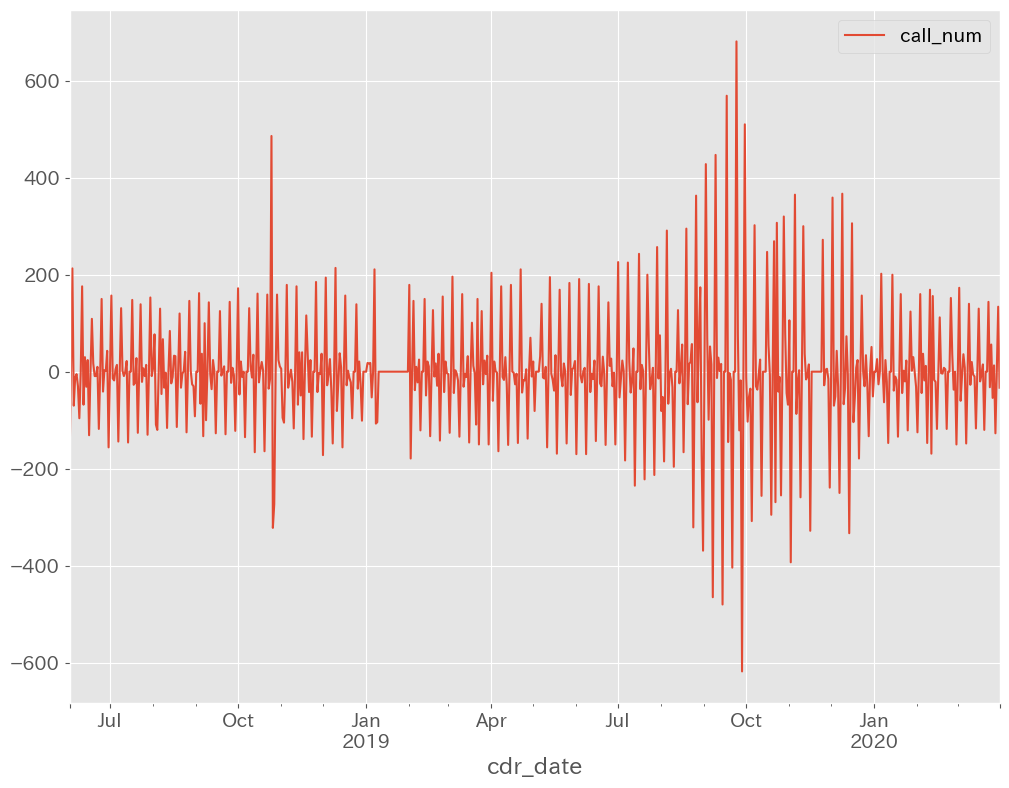

In [7]:
# 原系列の1日前の差分系列の生成
data1_d1 = data1.diff(1).dropna()

# グラフで確認
data1_d1.plot()
plt.show()


In [8]:
data1_d1.head()

,call_num
cdr_date,
2018-06-02,-183.0
2018-06-03,0.0
2018-06-04,213.0
2018-06-05,-70.0
2018-06-06,-12.0


In [9]:
#ADF検定
data1_test = adfuller(data1_d1.call_num)

# 出力 
print('ADF Statistic:', data1_test[0])
print('p-value:', data1_test[1])
print('Critical values:')
for i, j in data1_test[4].items():
    print('\t', i, j)

#1%有意！

ADF Statistic: -8.816972416062164
p-value: 1.9225843215656413e-14
Critical values:
	 1% -3.440466106307706
	 5% -2.8660036655537744
	 10% -2.569147085049656


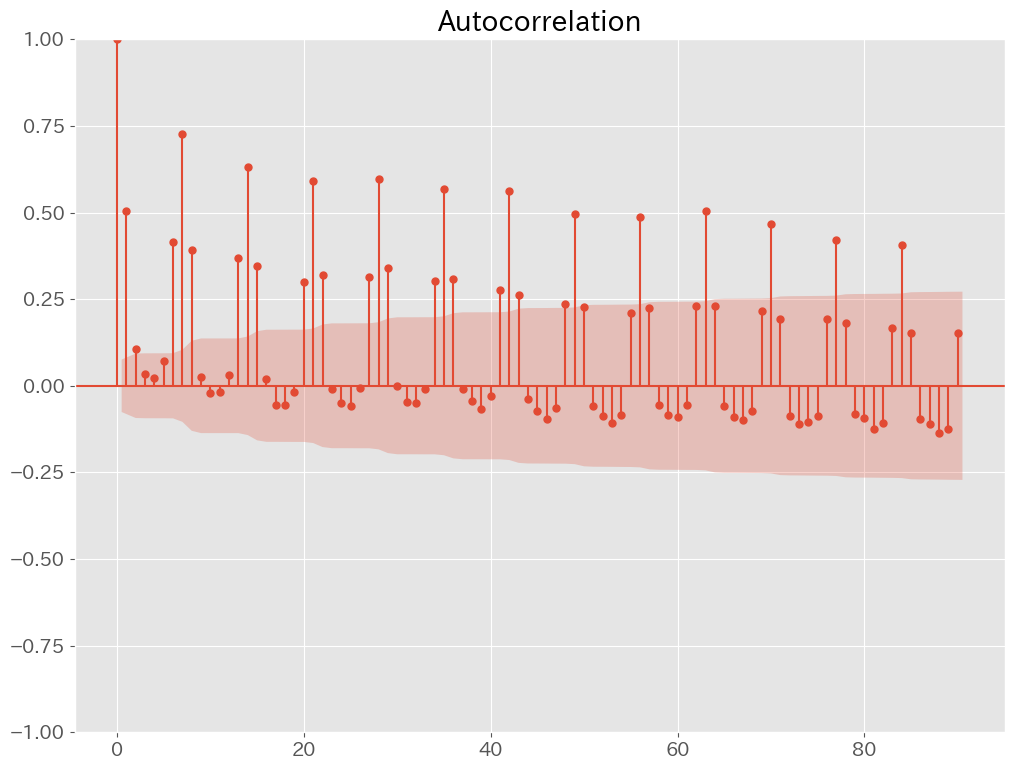

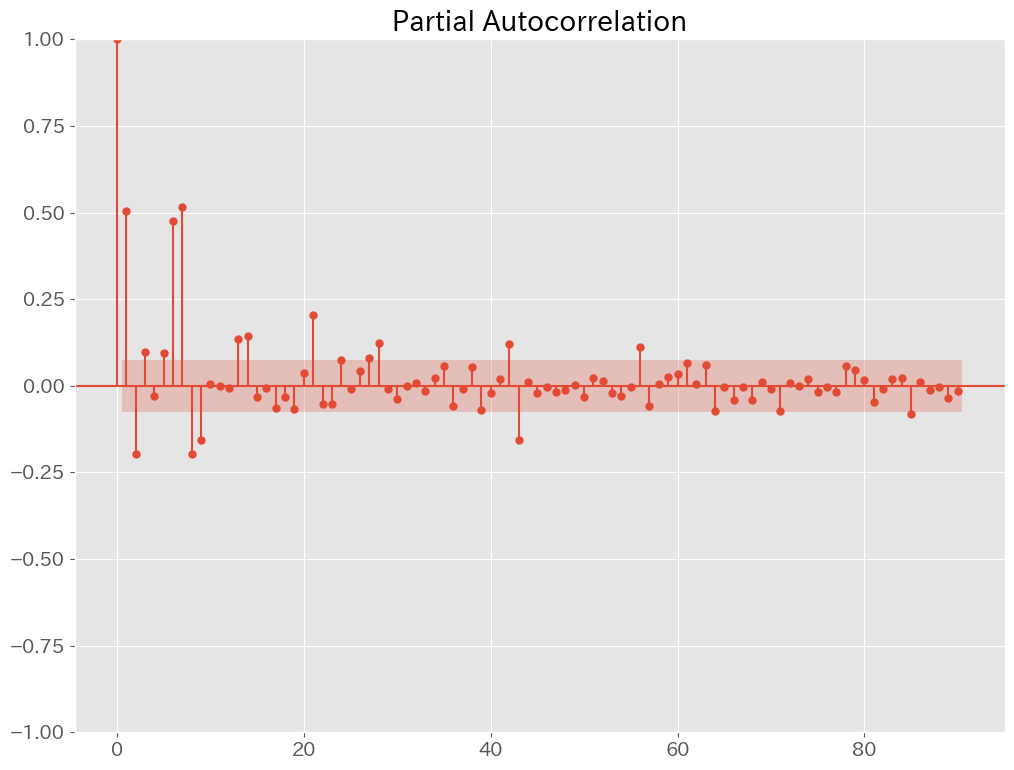

In [10]:
#data1のコレログラム
acf = plot_acf(data1.call_num, lags = 90)
pacf = plot_pacf(data1.call_num, lags = 90)

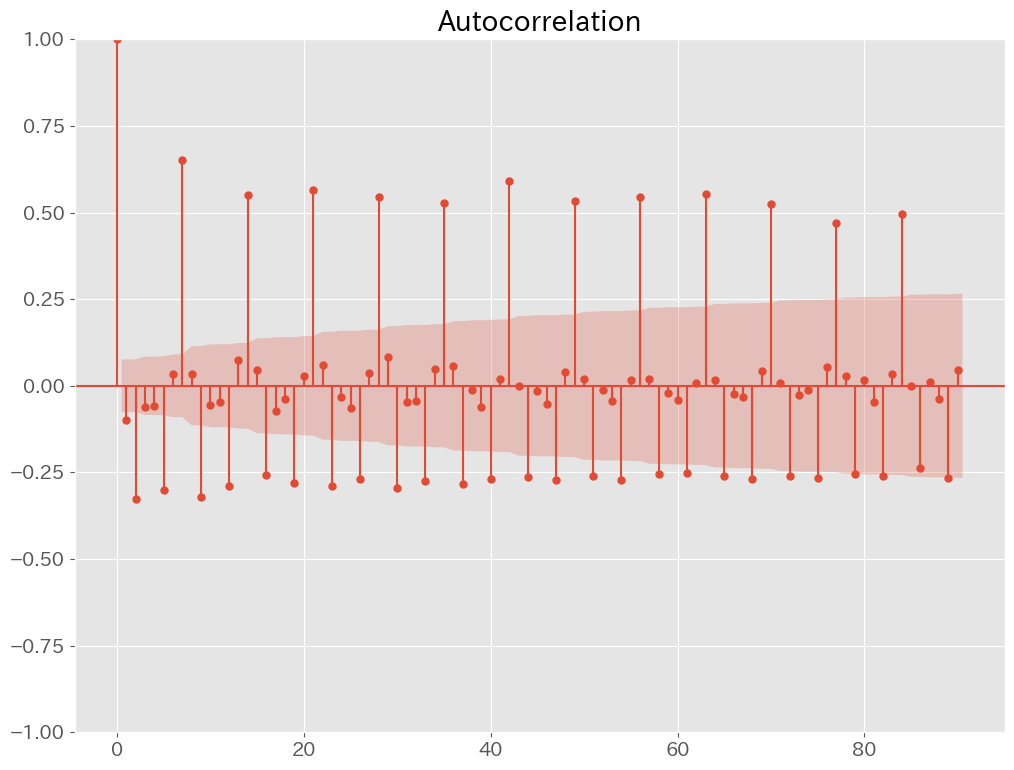

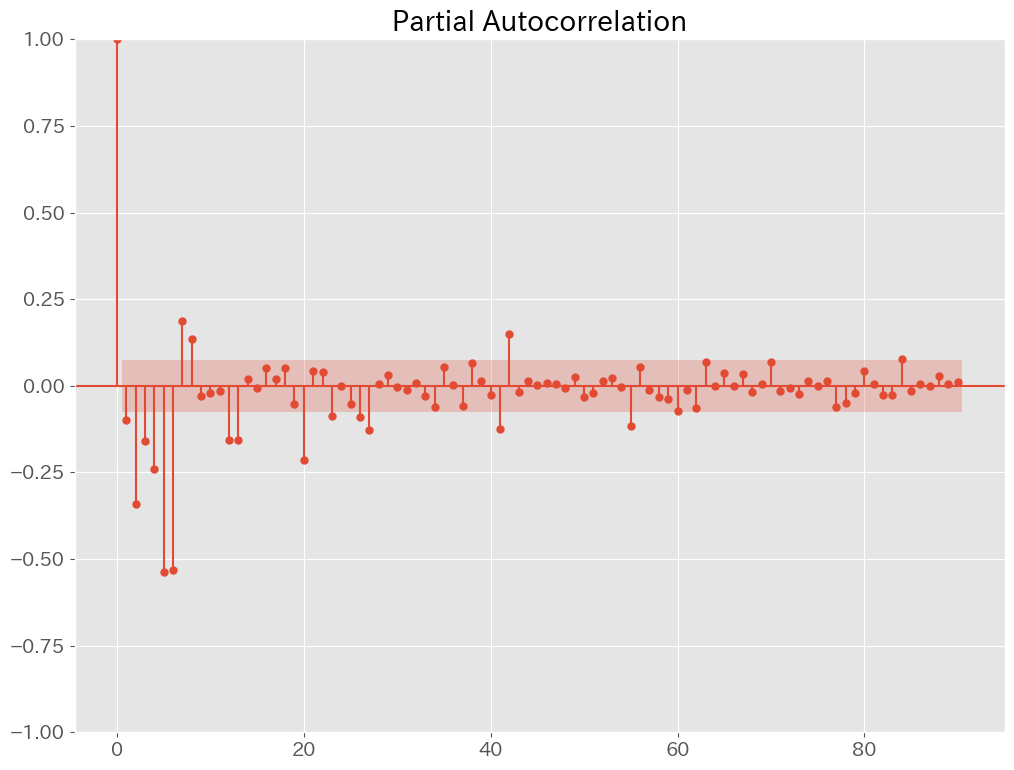

In [11]:
#data1_d1のコレログラム
acf = plot_acf(data1_d1.call_num, lags = 90)
pacf = plot_pacf(data1_d1.call_num, lags = 90)

# データ２(アカウント日次獲得数)のEDA

In [12]:
data2.head()

,acc_get_cnt
cdr_date,
2018-05-01,-0.926645
2018-05-02,-0.567495
2018-05-03,-1.050489
2018-05-04,-1.199103
2018-05-05,-1.360101


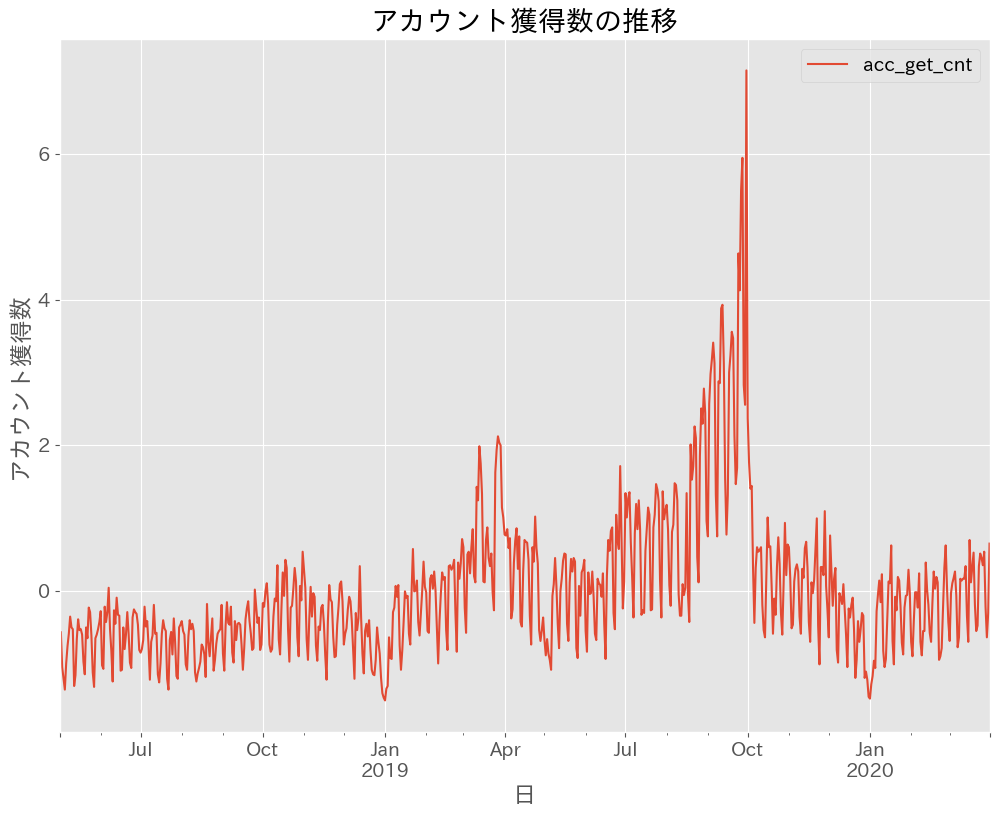

In [13]:
data2.plot()
plt.title('アカウント獲得数の推移') 
plt.ylabel('アカウント獲得数') 
plt.xlabel('日')               
plt.show()

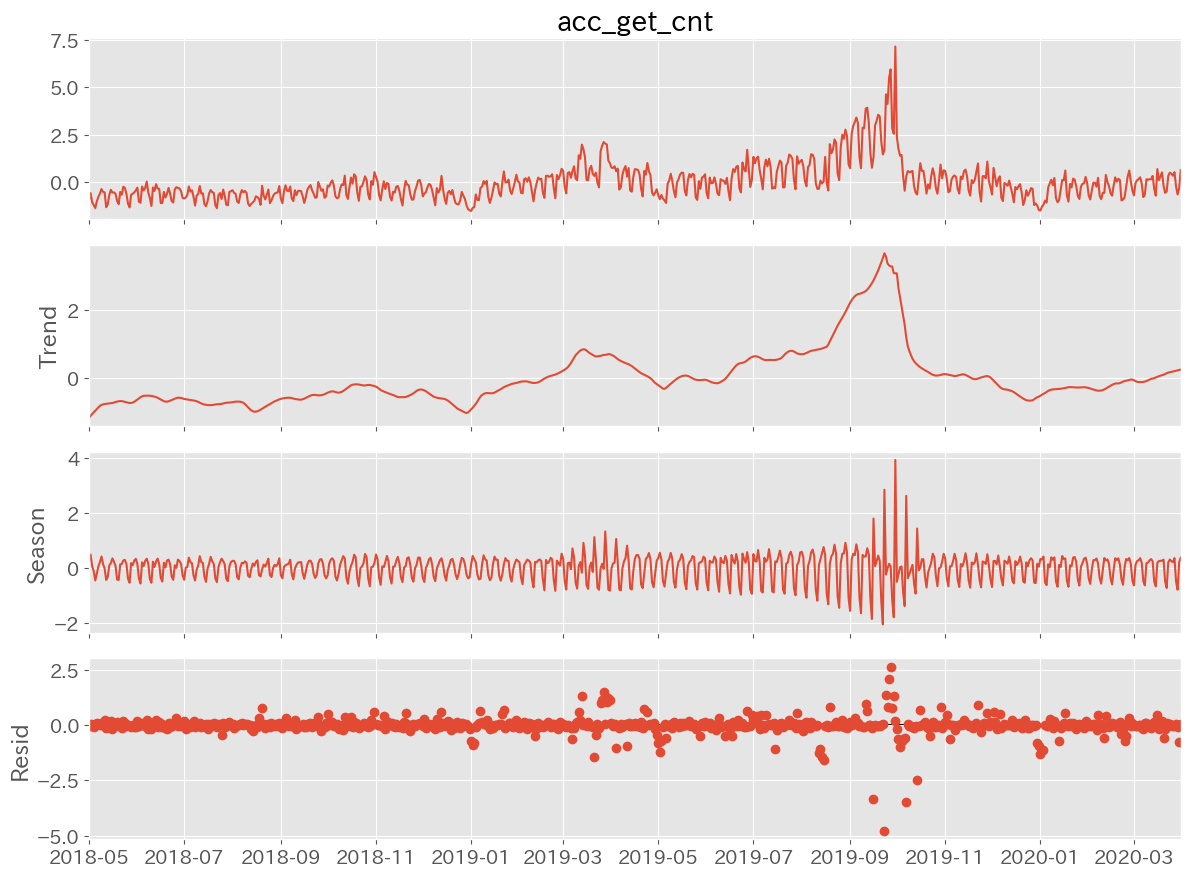

In [14]:
# STL分解（LOESS平滑化を利用した分解）

# 成分分解
stl=STL(
    data2.acc_get_cnt,
    period=7,
    robust=True).fit()

# STL分解結果のグラフ化
stl.plot()
plt.show()

In [15]:
# ADF検定
dftest = adfuller(data2.acc_get_cnt)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)

#p値が高いので、差分系列を作って定常過程にする

ADF Statistic: -2.1470194877873223
p-value: 0.22603269882438132
Critical values:
	 1% -3.4400031721739515
	 5% -2.865799725091594
	 10% -2.569038427768166


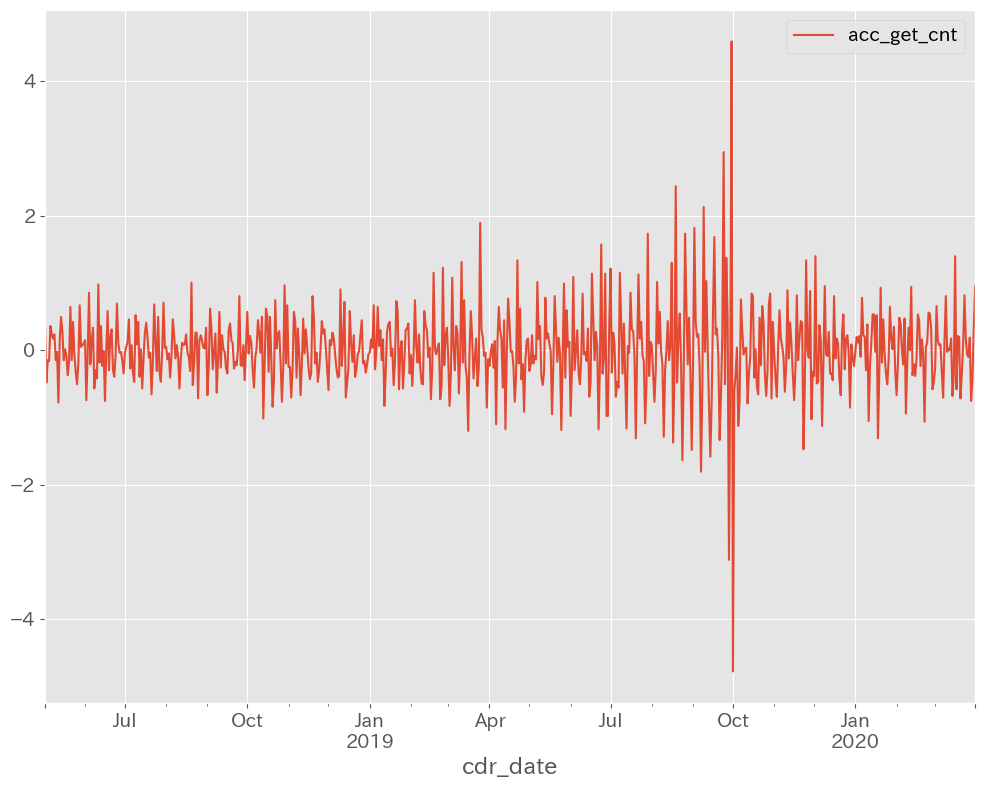

In [16]:
# 原系列の1日前の差分系列の生成
data2_d1 = data2.diff(1).dropna()

# グラフで確認
data2_d1.plot()
plt.show()

In [17]:
# ADF検定
dftest = adfuller(data2_d1.acc_get_cnt)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)
# 1%有意！

ADF Statistic: -6.6589660783951325
p-value: 4.90202384459828e-09
Critical values:
	 1% -3.4400174432106305
	 5% -2.8658060125001295
	 10% -2.569041777564251


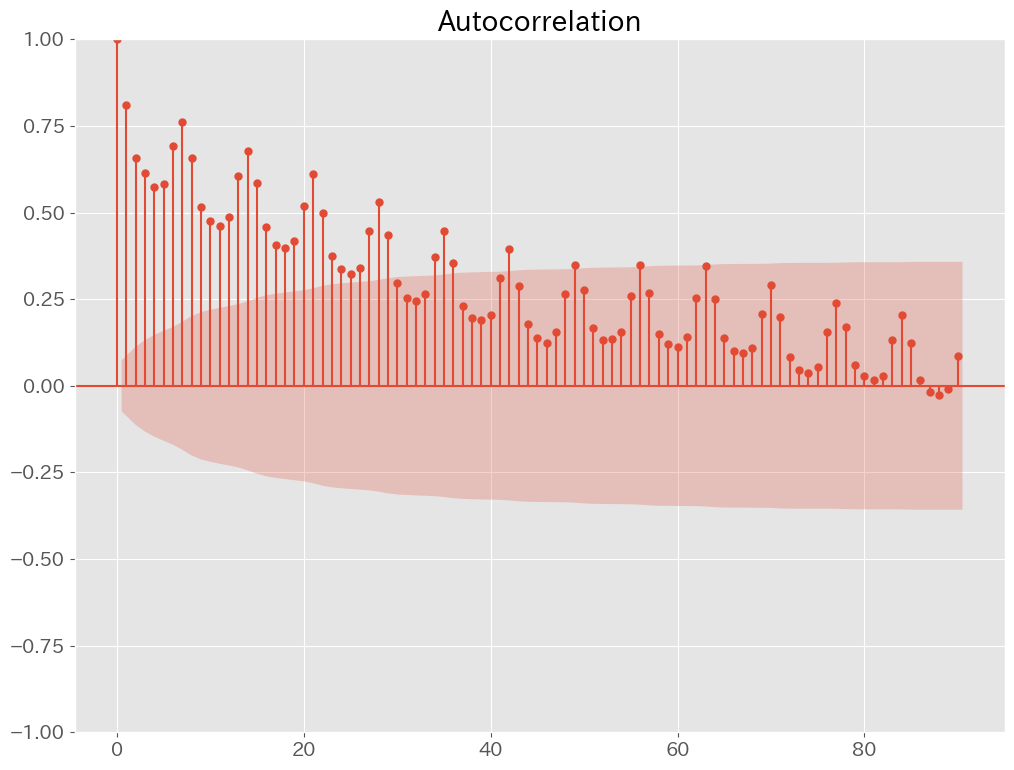

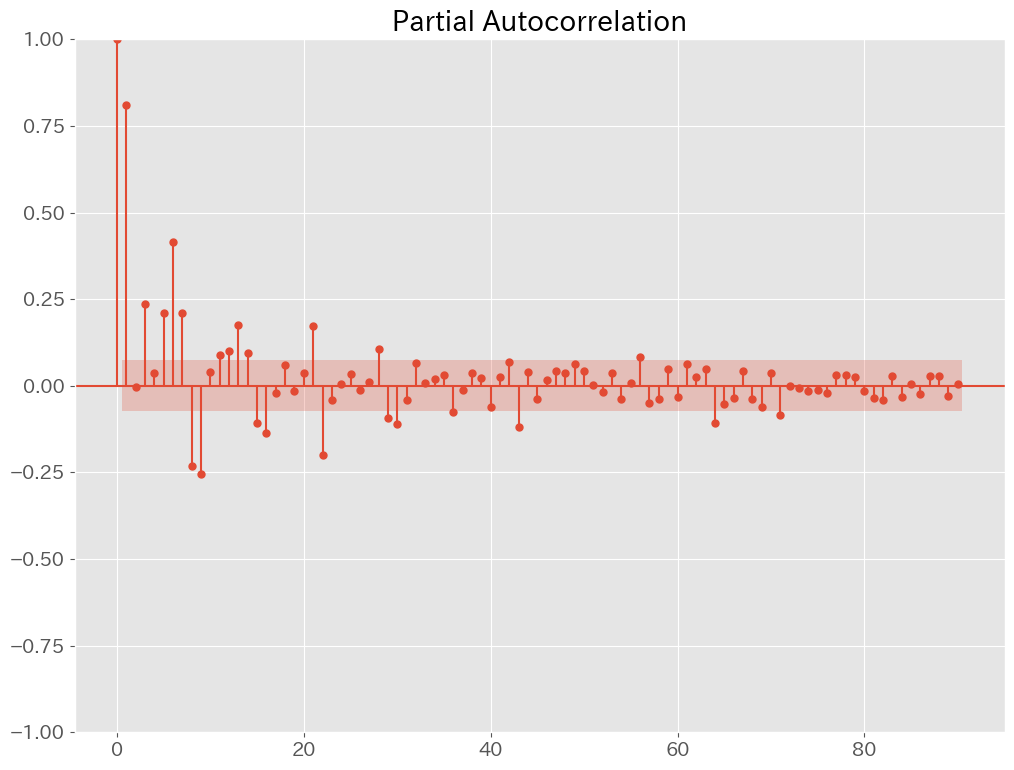

In [18]:
#data2のコレログラム
acf = plot_acf(data2.acc_get_cnt, lags = 90)
pacf = plot_pacf(data2.acc_get_cnt, lags = 90)

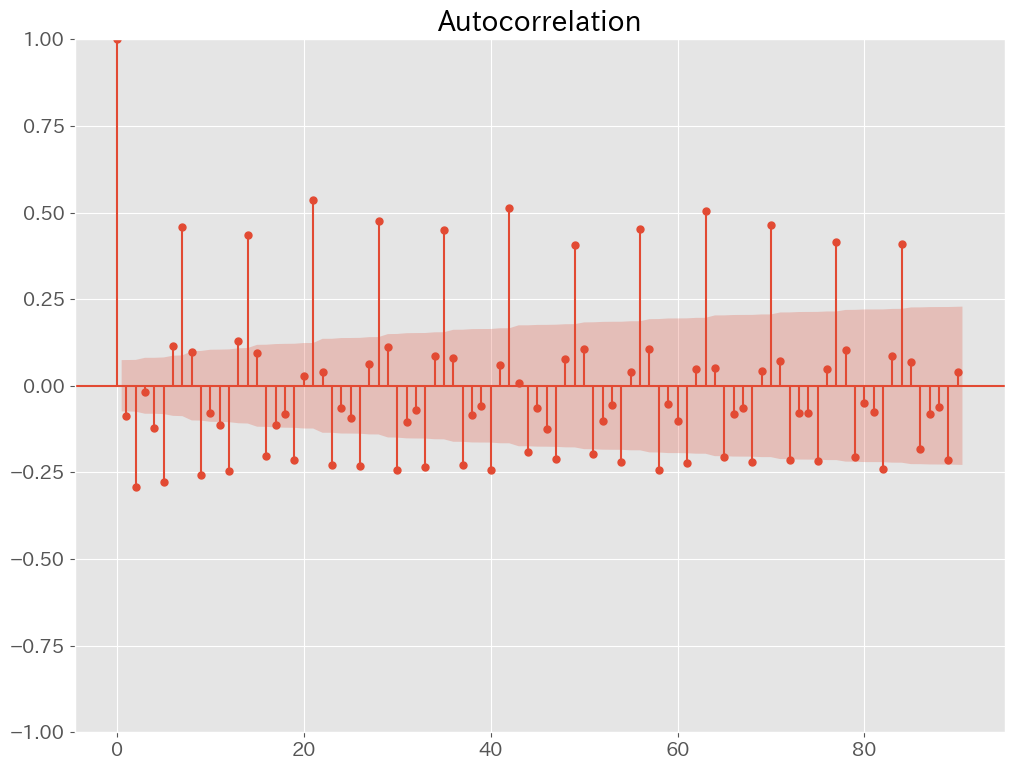

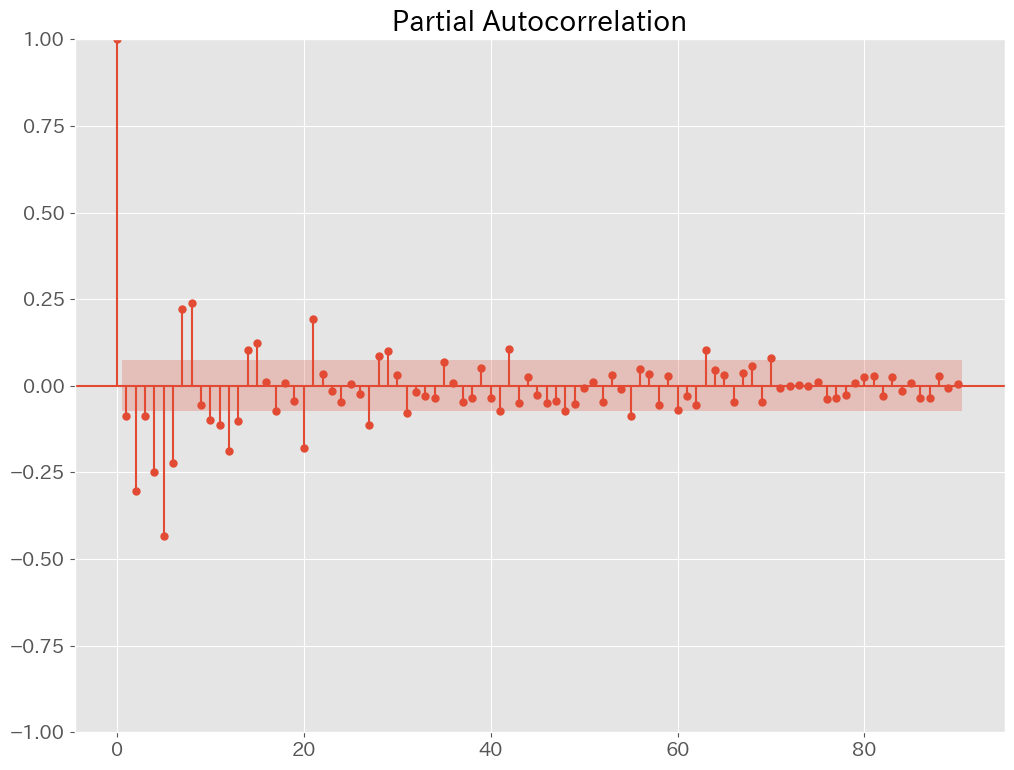

In [19]:
#data2_d1のコレログラム
acf = plot_acf(data2_d1.acc_get_cnt, lags = 90)
pacf = plot_pacf(data2_d1.acc_get_cnt, lags = 90)

# data1とdata2を合わせた分析

In [20]:
df = pd.merge(data1, data2, on='cdr_date', how='inner')
df.head()

,call_num,acc_get_cnt
cdr_date,,
2018-06-01,183,-0.282652
2018-06-02,0,-1.025720
2018-06-03,0,-1.075258
2018-06-04,213,-0.220730
2018-06-05,143,-0.431266


In [21]:
#acc_get_cntが標準化されているため
#StandardScalerを用いて"call_num"カラムを標準化し、データのスケールを合わせる

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['call_num'] = scaler.fit_transform(df[['call_num']])

# 標準化されたデータを表示
print(df)

            call_num  acc_get_cnt
cdr_date                         
2018-06-01  0.555056    -0.282652
2018-06-02 -0.972049    -1.025720
2018-06-03 -0.972049    -1.075258
2018-06-04  0.805402    -0.220730
2018-06-05  0.221263    -0.431266
...              ...          ...
2020-03-27  0.087745     0.534723
2020-03-28 -0.972049    -0.220730
2020-03-29 -0.972049    -0.641802
2020-03-30  0.146159    -0.307421
2020-03-31 -0.129220     0.646183

[670 rows x 2 columns]


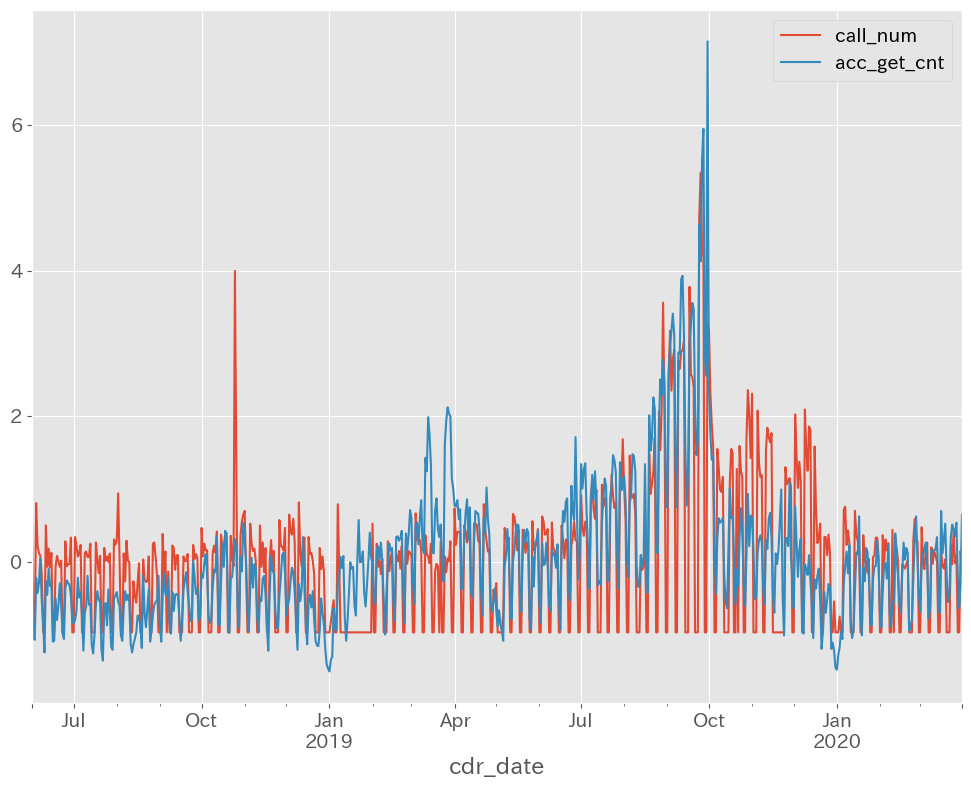

In [22]:
df.plot()
plt.show()

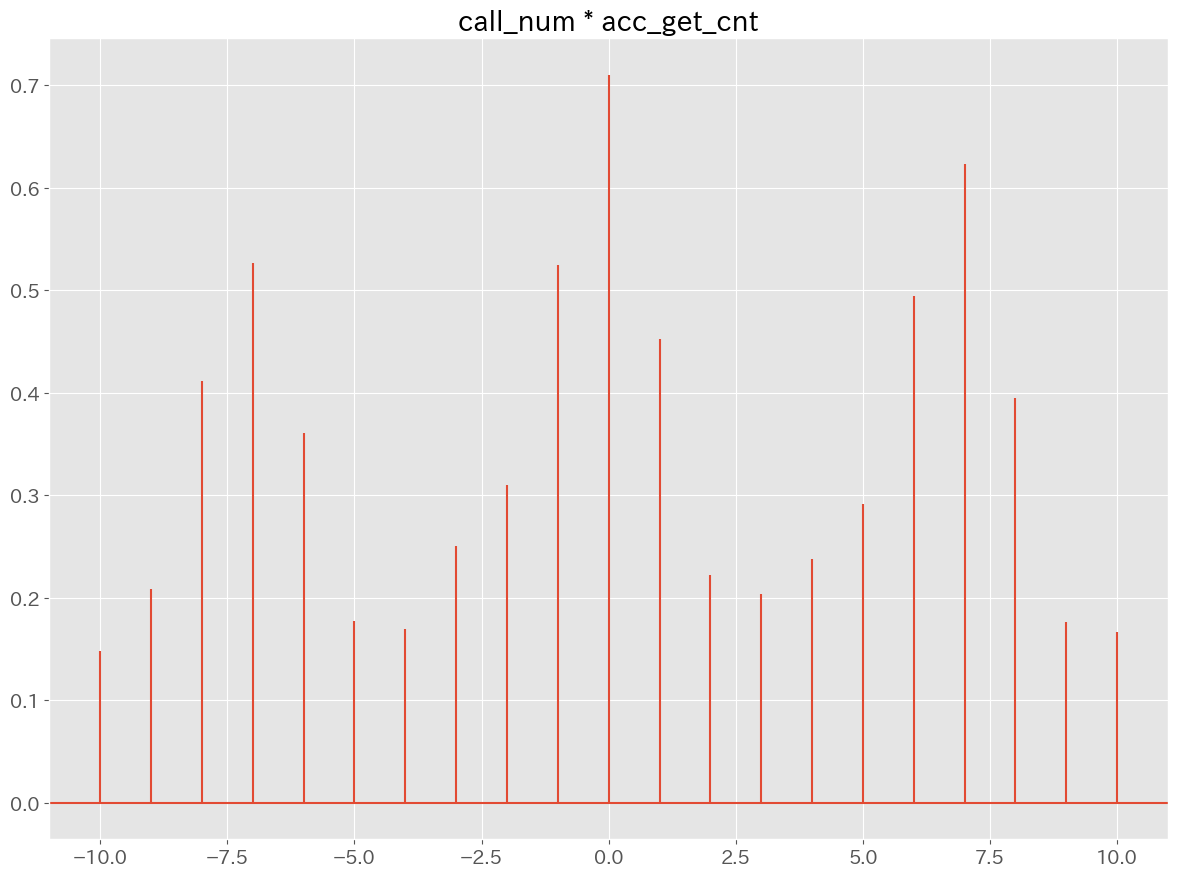

In [23]:
#相互相関のグラフ

fig, ax = plt.subplots(1, 1)  # 1行1列のグラフの枠を生成

# SaleaとOfflioneADの相互相関を描画
ax.xcorr(df.iloc[:, 0], df.iloc[:, 1])
ax.set_title(str(df.columns[0] + ' * ' + df.columns[1]))

fig.tight_layout()  # 作成したグラフを整える
plt.show()

#0, ±1, ±7の相関が高いことが分かる

In [24]:
#差分系列をつくり、両データを定常過程にする
df = df.diff(1).dropna()
df.head()

,call_num,acc_get_cnt
cdr_date,,
2018-06-02,-1.527106,-0.743068
2018-06-03,0.000000,-0.049538
2018-06-04,1.777451,0.854528
2018-06-05,-0.584139,-0.210536
2018-06-06,-0.100138,0.136229


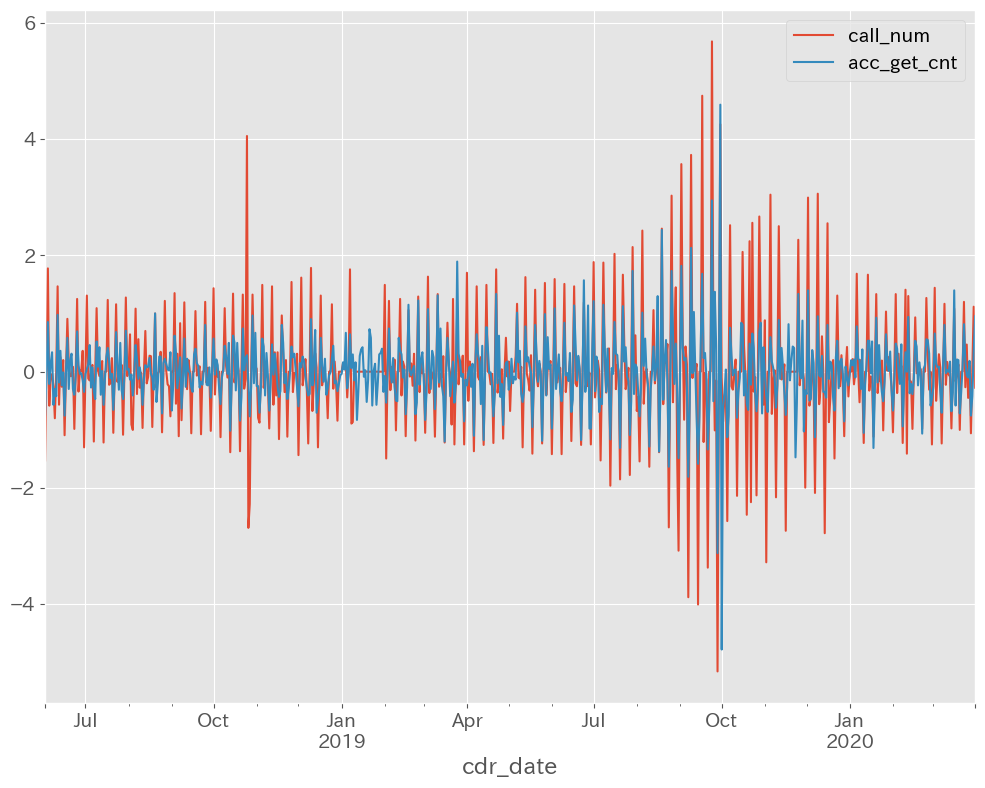

In [25]:
df.plot()
plt.show()

In [26]:
#差分系列でADF検定

for i in range(len(df.columns)): 
    #Augmented Dickey-Fuller 単位根検定
    c_results = adfuller(df.iloc[:,i],regression='c')  
    #p値出力
    print(df.columns[i],'\t',c_results[1]) 

#両者、1%有意

call_num 	 1.9225843215664614e-14
acc_get_cnt 	 1.2218435497473693e-08


# 因果関係の分析  
-----------------------------------------------------------------

ヘルプデスク入電数(acc_get_cnt)とアカウント獲得数(acc_get_cnt)の間には因果関係があると考えた。  
グレンジャー因果性の検定を使って両者の因果関係を定量的に分析する。

-----------------------------------------------------------------

In [27]:
# call_numとacc_get_cntの因果関係を調べるため、VARモデルを構築する

# 最大のラグ数
maxlags = 10

# モデルのインスタンス生成
var_model = VAR(df)

# 最適なラグの探索
lag = var_model.select_order(maxlags).selected_orders
print('最適なラグ：',lag['aic'],'\n')

# モデルの学習
results = var_model.fit(lag['aic'])

# 結果出力
print(results.summary())


最適なラグ： 8 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Jan, 2024
Time:                     01:16:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -2.67331
Nobs:                     661.000    HQIC:                  -2.81487
Log likelihood:          -881.913    FPE:                  0.0547797
AIC:                     -2.90446    Det(Omega_mle):       0.0520671
--------------------------------------------------------------------
Results for equation call_num
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 -0.001187         0.023508           -0.051           0.960
L1.call_num           -0.668262         0.048981          -13.643           0.000
L1.acc_get_cnt         0.183974         0.

In [28]:
#
# グレンジャー因果性の検定
#   帰無仮説：グレンジャー因果性なし
#   対立仮説：グレンジャー因果性あり
#

for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        if i != j :
            #因果の検定
            test_results = results.test_causality(causing=i, caused=j) 
            #p値
            test_results.pvalue
            #検定結果の出力
            print(df.columns[i],'->',df.columns[j],'\t',test_results.pvalue)

#1%有意

call_num -> acc_get_cnt 	 0.0001012972514028937
acc_get_cnt -> call_num 	 6.797802052496583e-08


-----------------------------------------------------------------

ヘルプデスク入電（call_num） -> アカウント獲得（acc_get_cnt）  
アカウント獲得（acc_get_cnt）-> ヘルプデスク入電（call_num）   
ともに因果性があると考えられる。  
  
常識的に考えて、ヘルプデスク入電 -> アカウント獲得 の順番が因果関係だと思われる。  

-----------------------------------------------------------------

# データ３(CM実施フラグ)のEDA

In [29]:
#CM実施フラグの累積数データを追加
data3['cm_cumsum'] = data3['cm_flg'].cumsum()
data3.head(30)

,cm_flg,cm_cumsum
cdr_date,,
2018-03-01,0,0
2018-03-02,0,0
2018-03-03,0,0
2018-03-04,0,0
2018-03-05,0,0
2018-03-06,0,0
2018-03-07,0,0
2018-03-08,0,0
2018-03-09,0,0


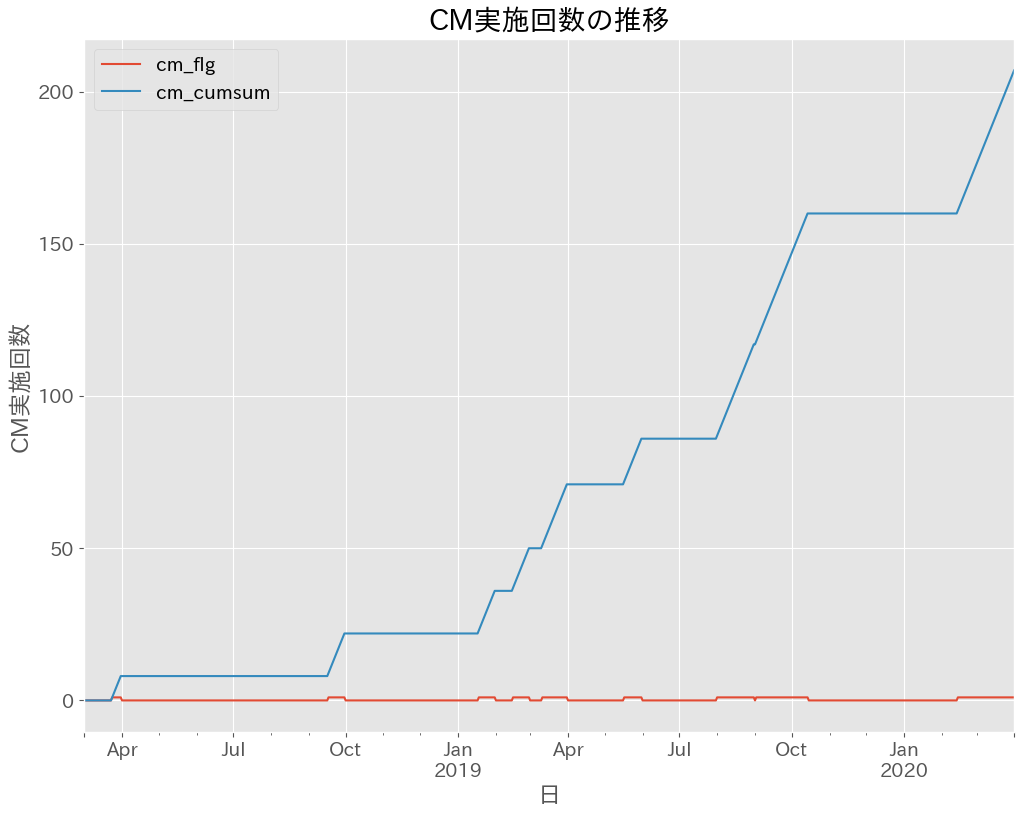

In [30]:
data3.plot()
plt.title('CM実施回数の推移')                            #グラフタイトル
plt.ylabel('CM実施回数') #タテ軸のラベル
plt.xlabel('日')                                #ヨコ軸のラベル
plt.show()

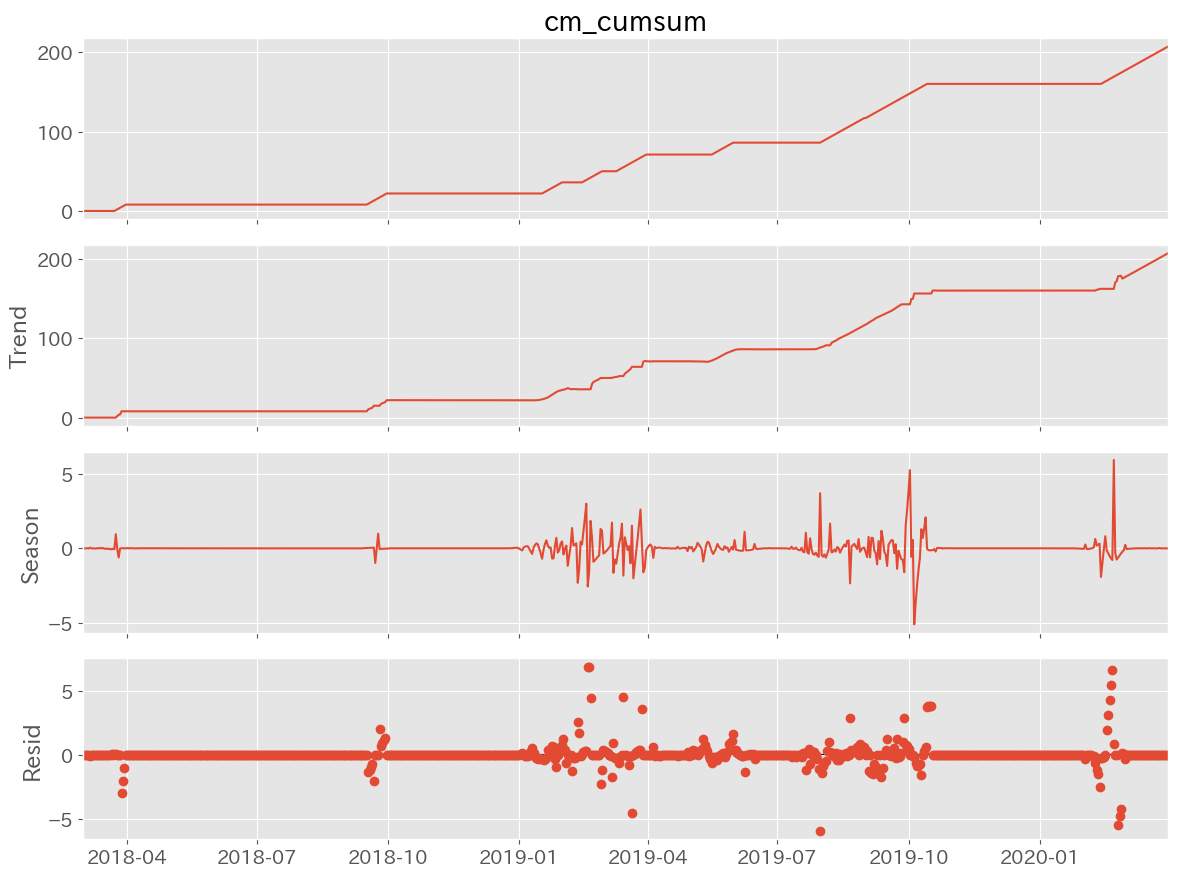

In [31]:
# STL分解（LOESS平滑化を利用した分解）

# 成分分解
stl=STL(
    data3.cm_cumsum,
    period=7,
    robust=True).fit()

# STL分解結果のグラフ化
stl.plot()
plt.show()

In [32]:
# ADF検定
dftest = adfuller(data3.cm_cumsum)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)

#累積値だから、非定常なのは当たり前

ADF Statistic: 1.0000483301758991
p-value: 0.9942664584610421
Critical values:
	 1% -3.4391580196774494
	 5% -2.8654273226340554
	 10% -2.5688400274762397


# データ４(GoogleTrend関連ワードの、週ごとの検索数)のEDA

In [33]:
data4.head()

,search_cnt
cdr_date,
2018-03-04,49
2018-03-11,25
2018-03-18,31
2018-03-25,25
2018-04-01,19


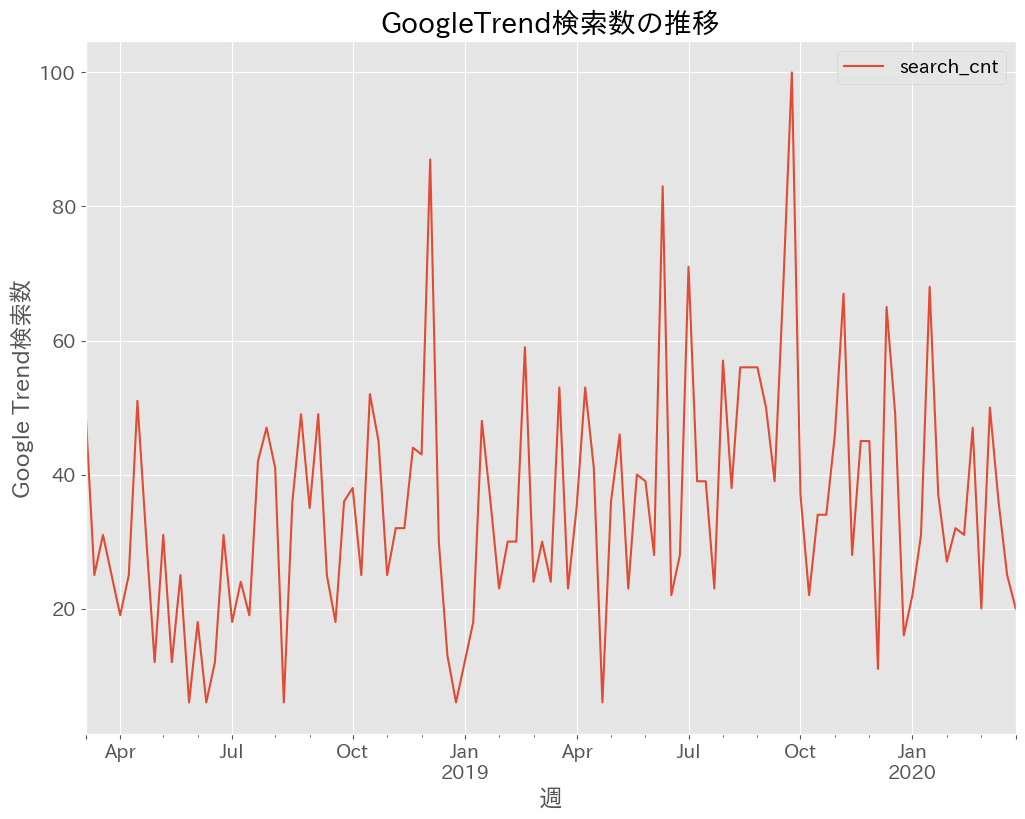

In [34]:
data4.plot()
plt.title('GoogleTrend検索数の推移')                            #グラフタイトル
plt.ylabel('Google Trend検索数') #タテ軸のラベル
plt.xlabel('週')                                #ヨコ軸のラベル
plt.show()

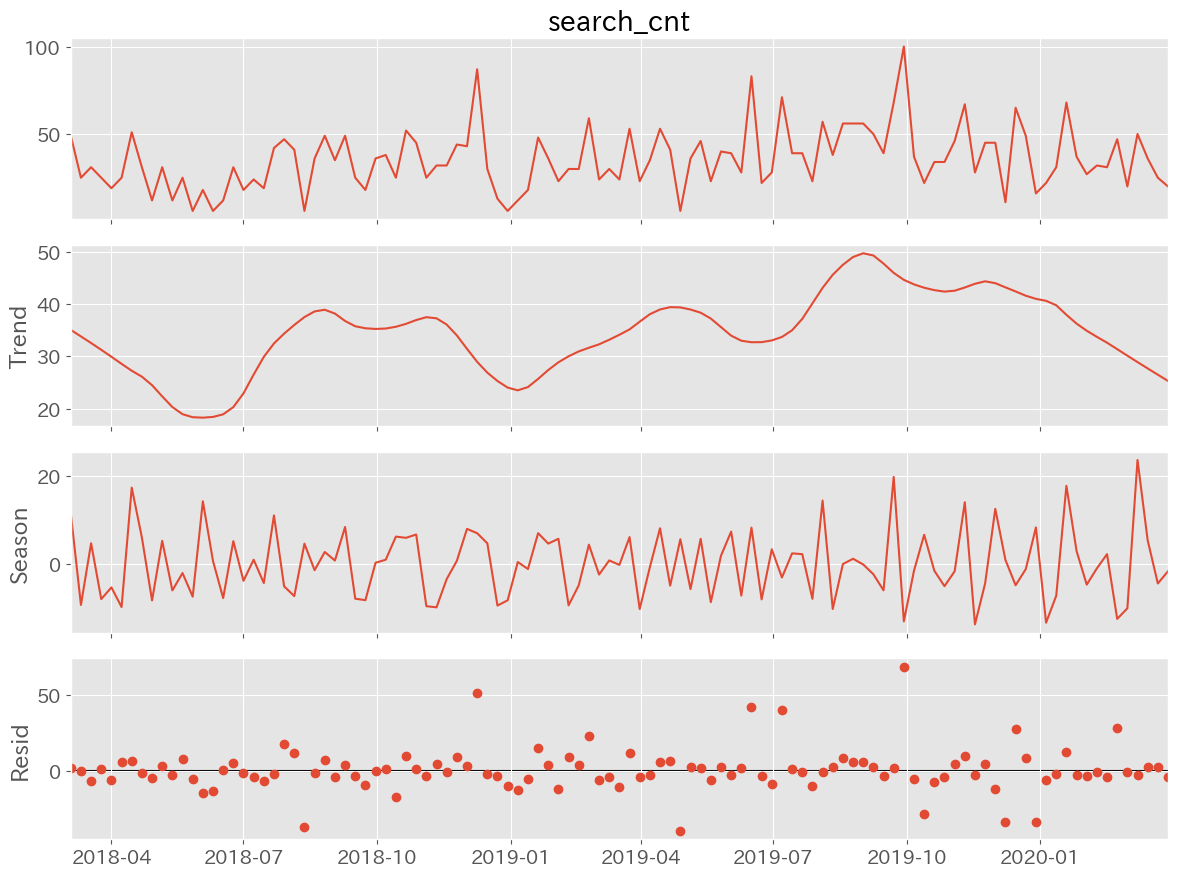

In [35]:
#
# STL分解（LOESS平滑化を利用した分解）
#

# 成分分解
stl=STL(
    data4.search_cnt,
    period=7,
    robust=True).fit()

# STL分解結果のグラフ化
stl.plot()
plt.show()

In [36]:
# 原系列に対するADF検定

# ADF検定
dftest = adfuller(data4.search_cnt)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)
    
# 1%有意！

ADF Statistic: -8.705304235491603
p-value: 3.714129357673484e-14
Critical values:
	 1% -3.4924012594942333
	 5% -2.8886968193364835
	 10% -2.5812552709190673


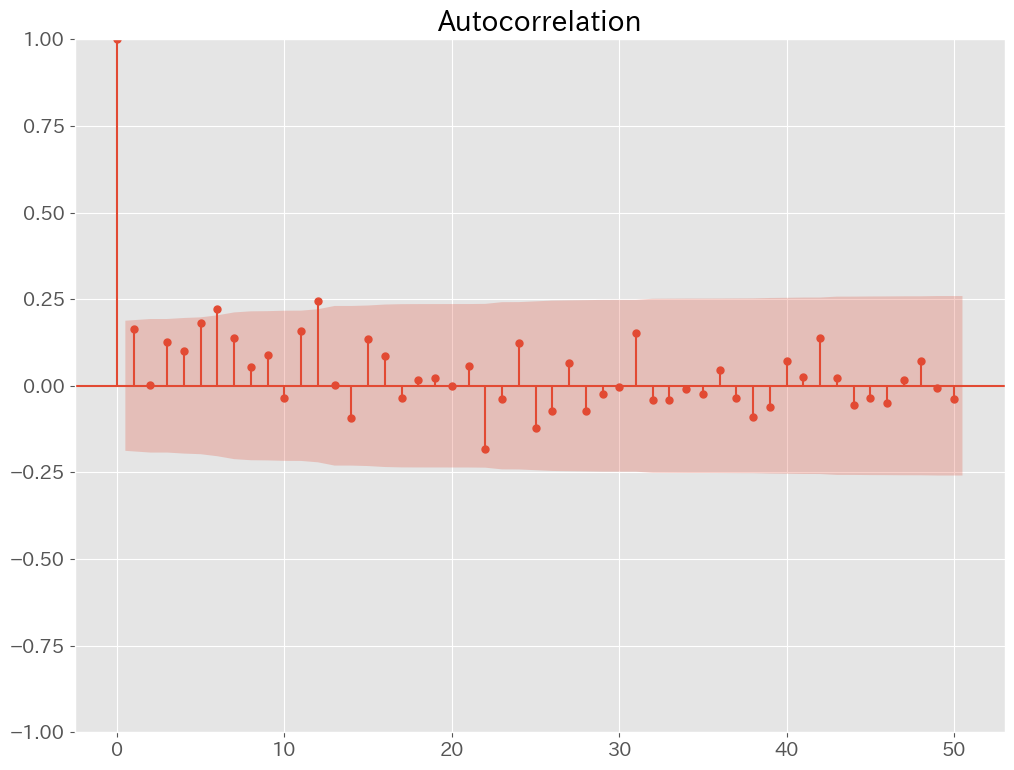

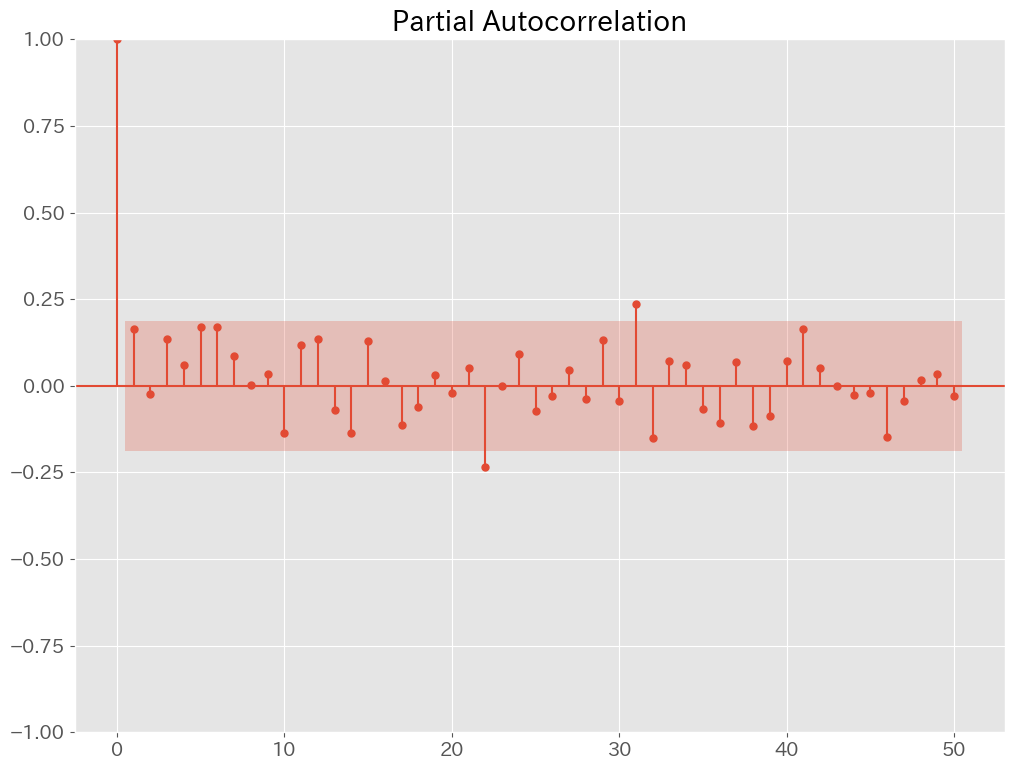

In [37]:
#
# 原系列の自己相関
#

acf = plot_acf(data4.search_cnt, lags=50)   #自己相関
pacf = plot_pacf(data4.search_cnt, lags=50) #偏自己相関

# データ５　カレンダーデータ

In [38]:
data5.sample(30)

,dow,dow_name,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,holiday_name
cdr_date,,,,,,,,,
2019-08-02,5,金,31,1,214,2019,True,False,NaN
2019-07-08,1,月,28,2,189,2019,False,False,NaN
2019-04-13,6,土,15,2,103,2019,True,True,NaN
2019-04-03,3,水,14,1,93,2019,False,False,NaN
2018-06-23,6,土,25,4,174,2018,True,True,NaN
2018-11-26,1,月,48,5,330,2018,False,False,NaN
2019-11-09,6,土,45,2,313,2019,True,True,NaN
2019-07-22,1,月,30,4,203,2019,False,False,NaN
2019-05-18,6,土,20,3,138,2019,True,True,NaN


# データ６ GoogleTrend"モバイルPOS"検索数

In [39]:
data6.head()

,search_trend
cdr_date,
2017-01-01,24
2017-02-01,0
2017-03-01,33
2017-04-01,30
2017-05-01,0


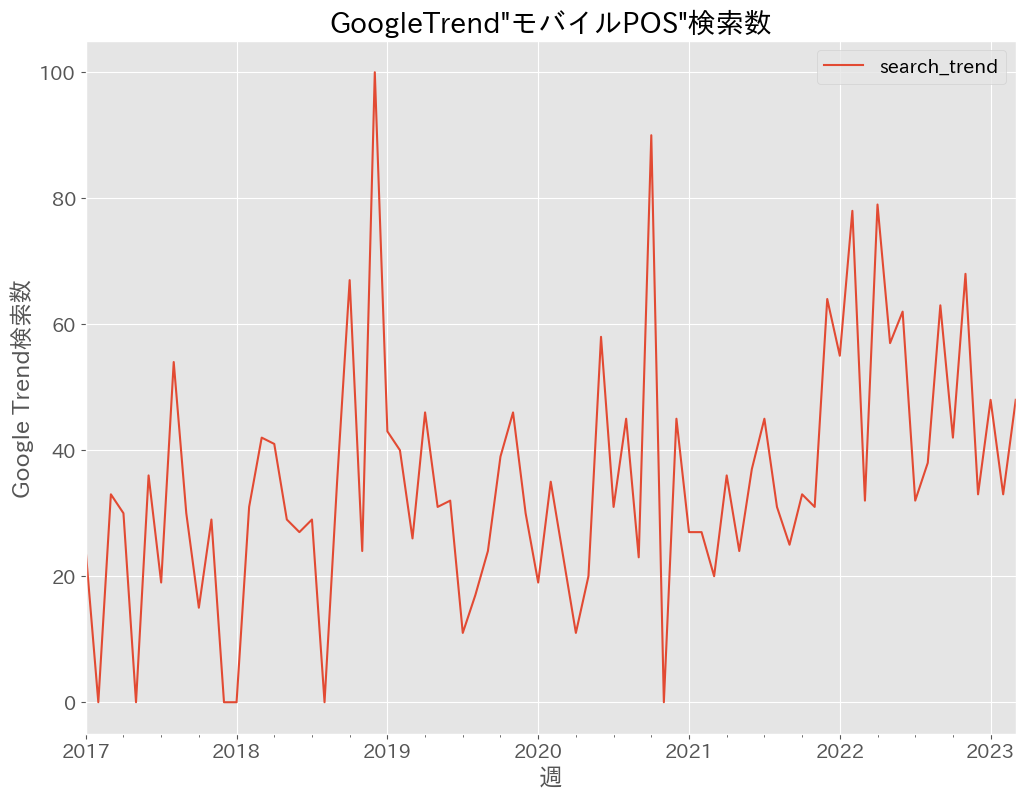

In [40]:
data6.plot()
plt.title('GoogleTrend"モバイルPOS"検索数')                            #グラフタイトル
plt.ylabel('Google Trend検索数') #タテ軸のラベル
plt.xlabel('週')                                #ヨコ軸のラベル
plt.show()

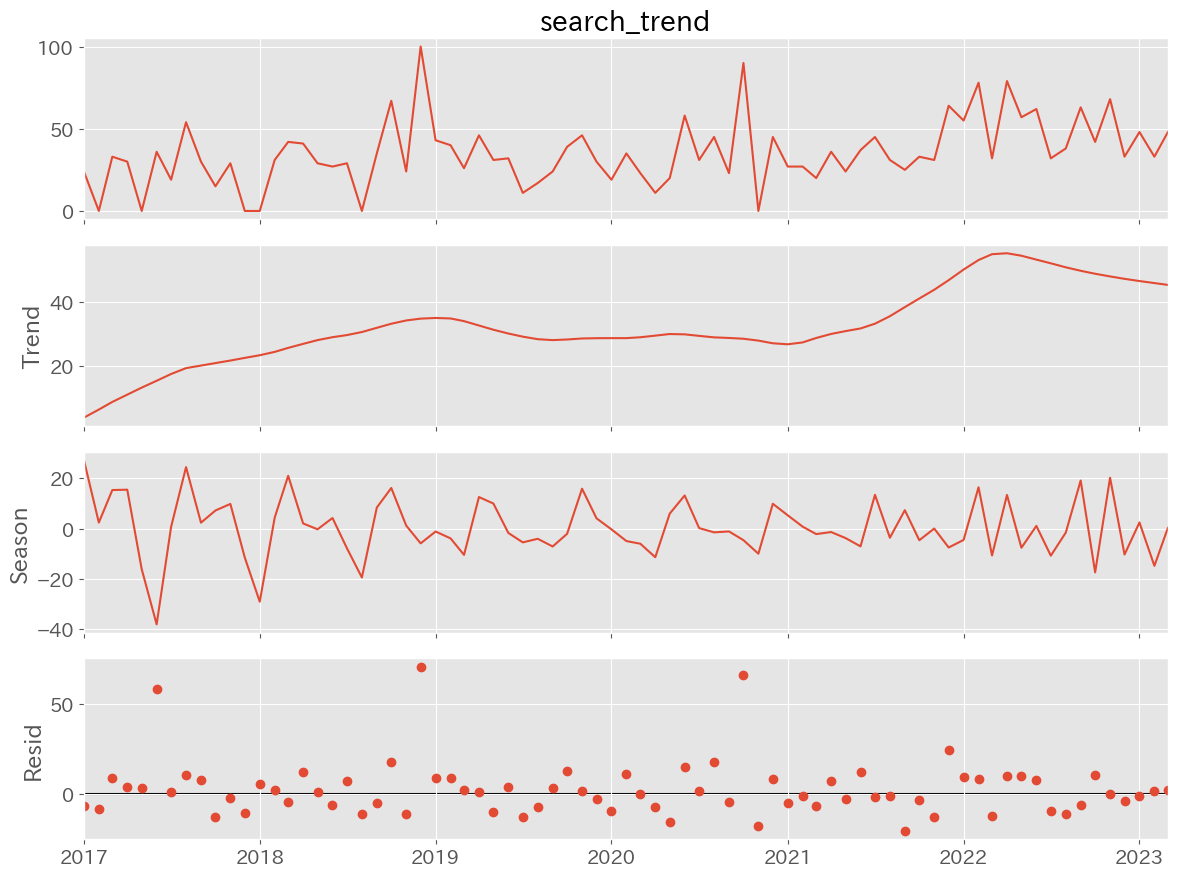

In [41]:
#
# STL分解（LOESS平滑化を利用した分解）
#

# 成分分解
stl=STL(
    data6.search_trend,
    period=7,
    robust=True).fit()

# STL分解結果のグラフ化
stl.plot()
plt.show()

In [42]:
# 原系列に対するADF検定

# ADF検定
dftest = adfuller(data6.search_trend)

# 出力
print('ADF Statistic:', dftest[0])
print('p-value:', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
    print('\t', i, j)
    
# 1%有意！

ADF Statistic: -4.155634616521972
p-value: 0.0007825824780551394
Critical values:
	 1% -3.5232835753964475
	 5% -2.902030597326081
	 10% -2.5883710883843123


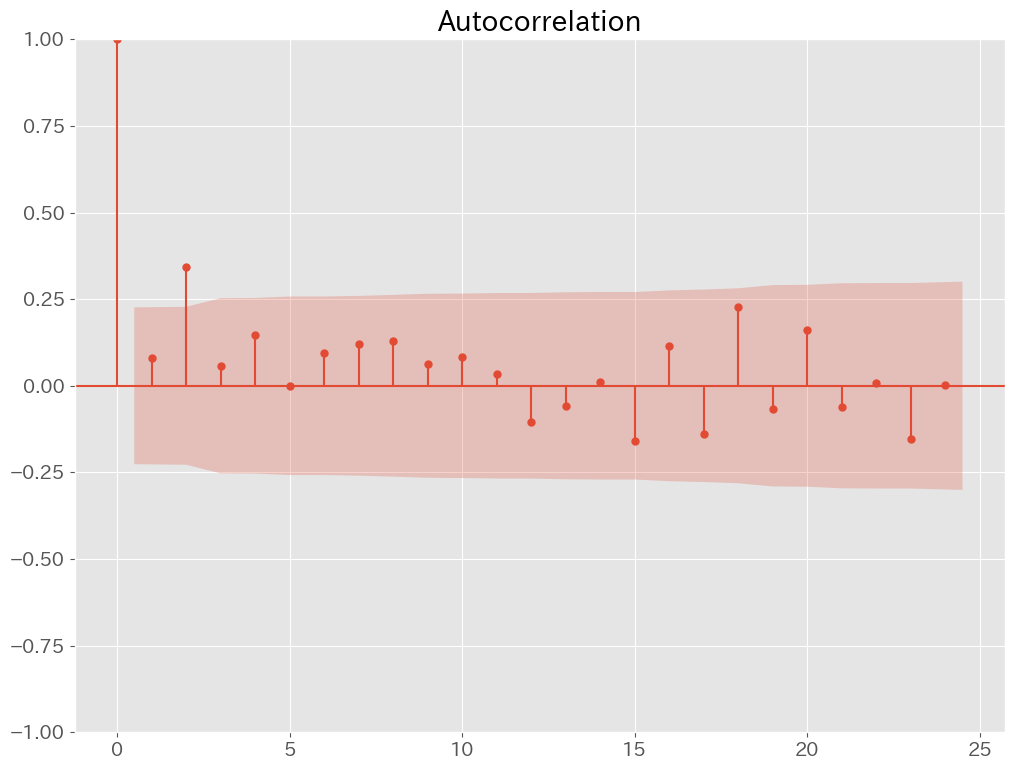

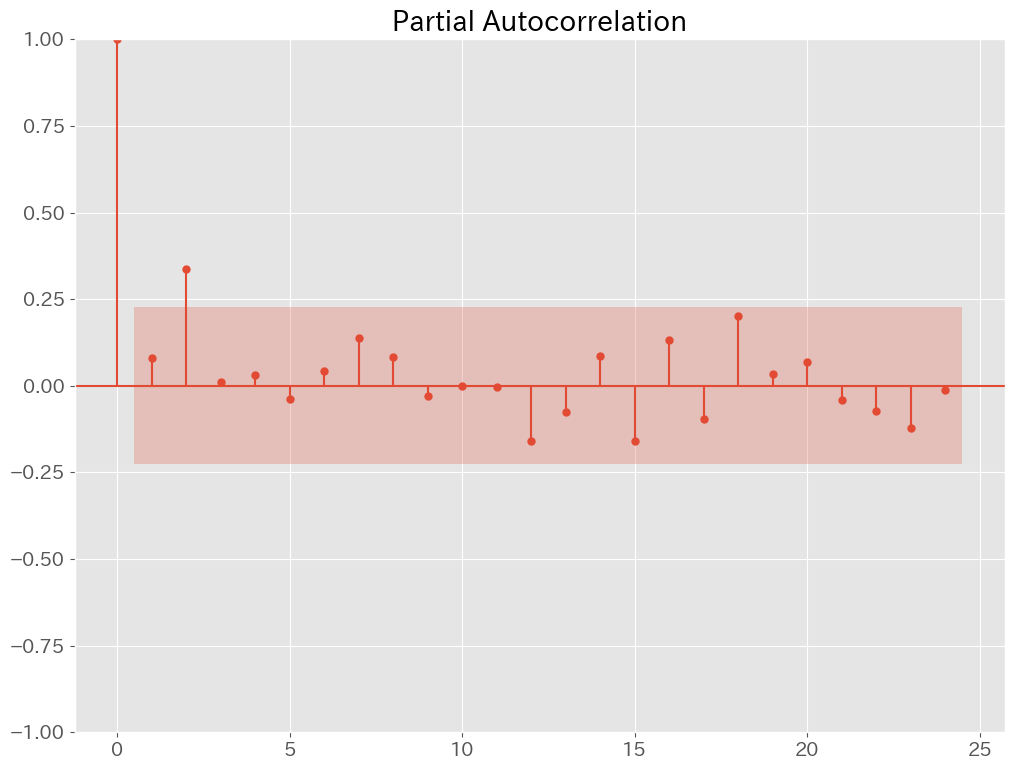

In [43]:
#
# 原系列の自己相関
#

acf = plot_acf(data6.search_trend, lags=24)   #自己相関
pacf = plot_pacf(data6.search_trend, lags=24) #偏自己相関